## Problem Statement:

 The goal of the project is to analyze whether a person makes more than 50,000 salary or not

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("adult.csv")

In [72]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [73]:
df.shape

(48842, 15)

In [74]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [75]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Handling NULL Values

In [77]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Handling Duplicate Values

In [78]:
df.duplicated().sum()

np.int64(52)

In [79]:
df.drop_duplicates(inplace = True)

In [80]:
df.duplicated().sum()

np.int64(0)

## Descriptive Analysis of data

In [81]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Separating Numerical and Categorical columns

In [82]:
categorical_cols = df.select_dtypes(include = ['object']).columns
numerical_cols = df.select_dtypes(exclude = ['object']).columns
print("Categorical Columns: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

Categorical Columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
Numerical Columns:  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


## Unique Values in categorical Columns

In [83]:
df['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [84]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [85]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

In [86]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [87]:
df['relationship'].value_counts()

relationship
Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [88]:
df['race'].value_counts()

race
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [89]:
df['gender'].value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [90]:
df['income'].value_counts()

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [91]:
df['native-country'].value_counts()

native-country
United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

## Replace ? with mode of the column

In [92]:
mode_occ = df['occupation'].mode()[0]
df['occupation']= df['occupation'].replace("?",mode_occ)
mode_workclass = df['workclass'].mode()[0]
df['workclass']=df['workclass'].replace("?",mode_workclass)
mode_country=df['native-country'].mode()[0]
df['native-country'] = df['native-country'].replace("?",mode_country)

# Data Visualization

C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1835978397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1835978397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1835978397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1835978397.py:5: F

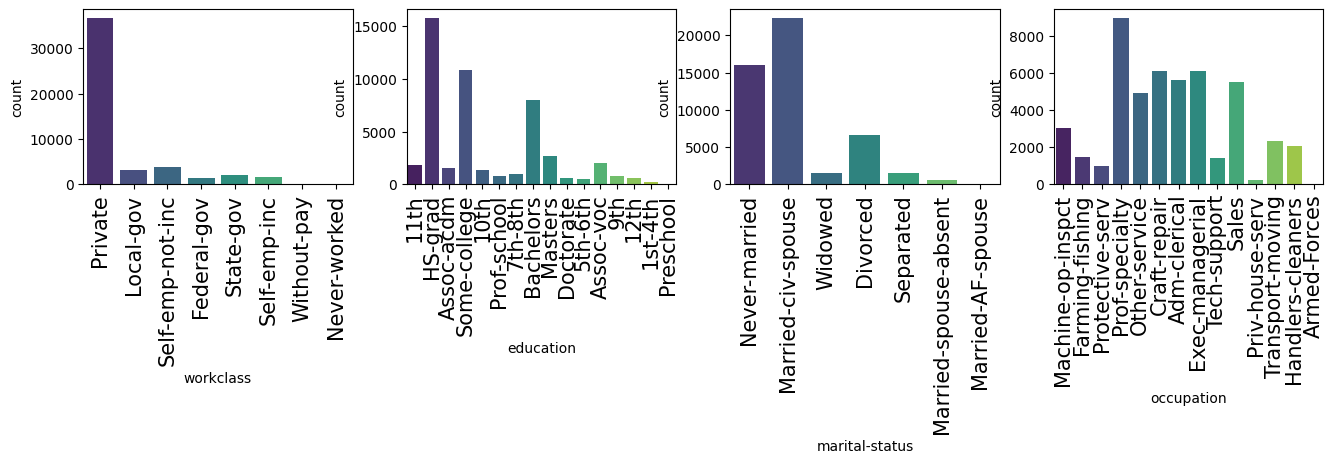

In [93]:
plt.figure(figsize= (16,5))
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation']
for i in range(0,len(categorical_cols)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
    plt.xticks(size= 15,rotation = 90)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\2914621644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\2914621644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\2914621644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\2914621644.py:5: F

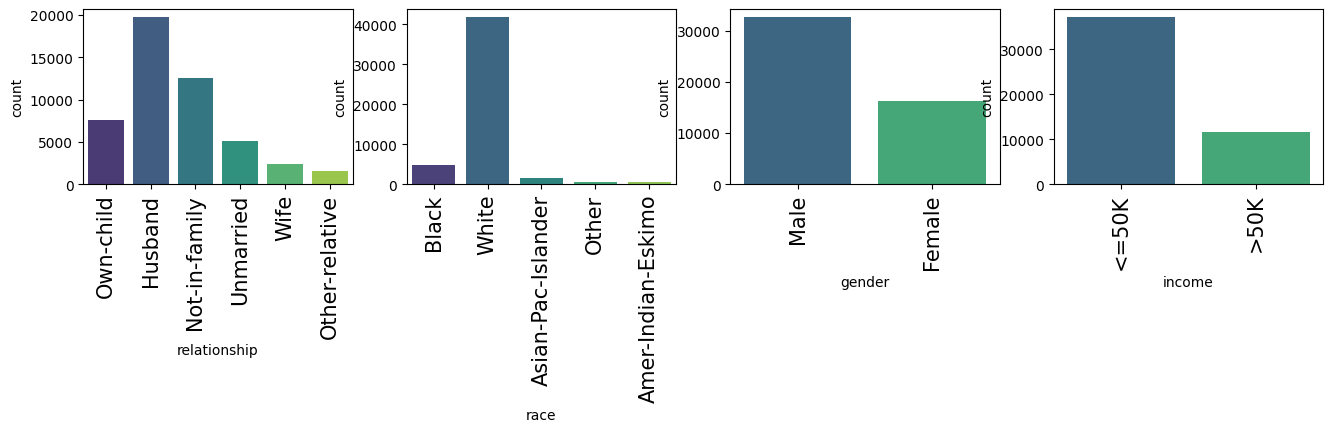

In [62]:
plt.figure(figsize= (16,5))
categorical_cols = ['relationship', 'race', 'gender',  'income']
for i in range(0,len(categorical_cols)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[categorical_cols[i]],palette= "viridis")
    plt.xticks(size= 15,rotation = 90)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\949530756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['native-country'],palette= "viridis")


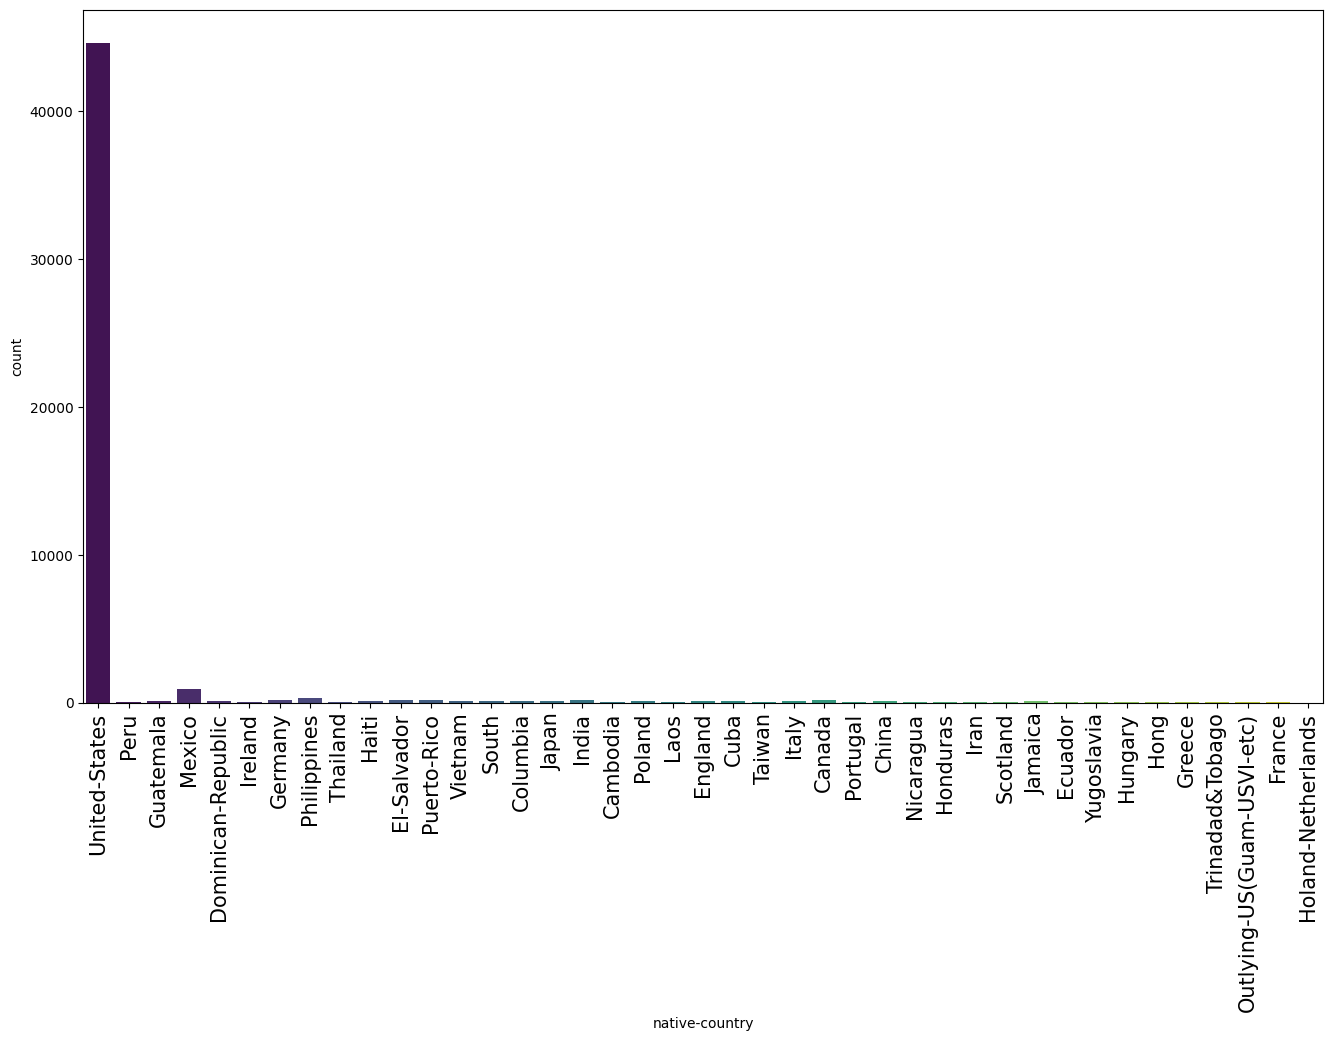

In [67]:
plt.figure(figsize= (16,9))

sns.countplot(x=df['native-country'],palette= "viridis")
plt.xticks(size= 15,rotation = 90)
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1060781979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[numerical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1060781979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[numerical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1060781979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[numerical_cols[i]],palette= "viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\1060781979.py:4: FutureWarning

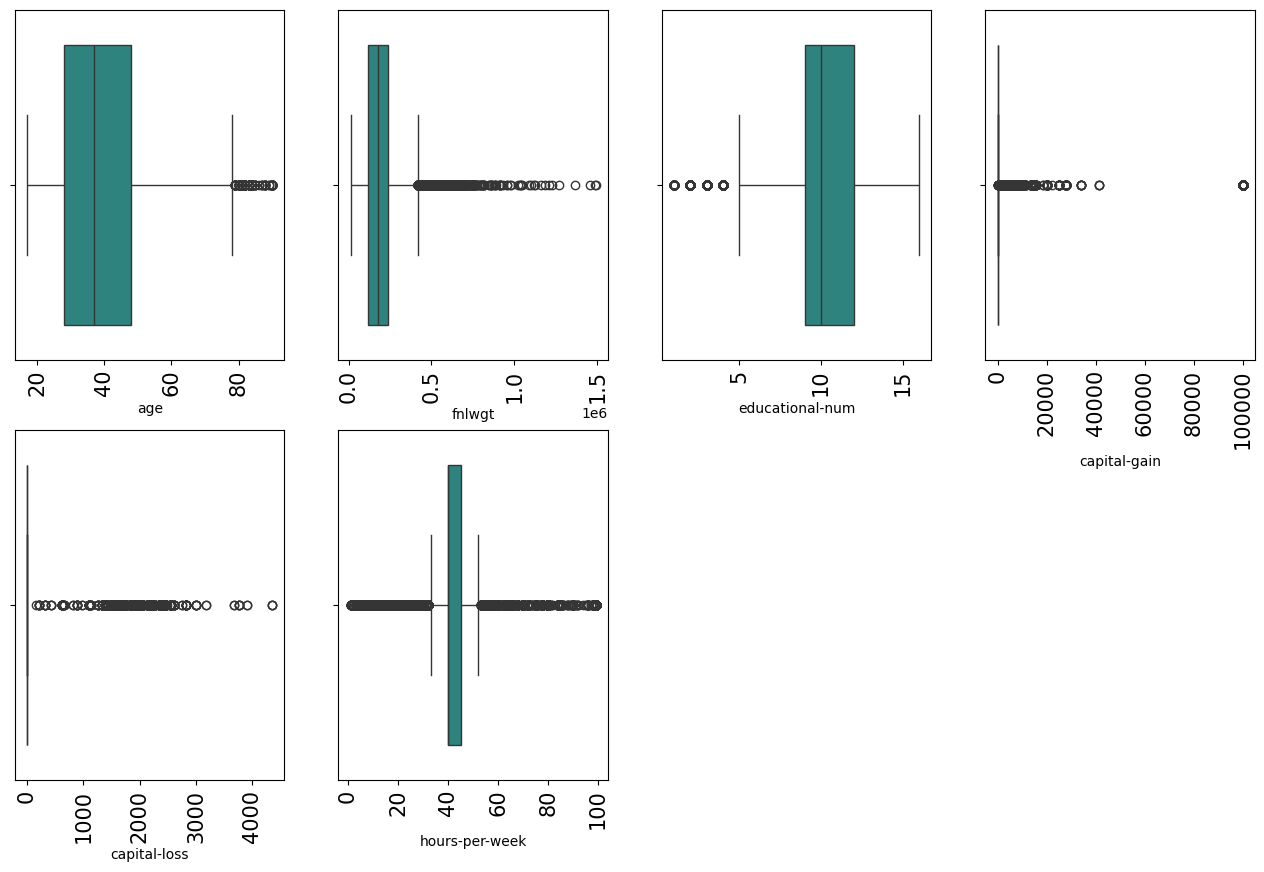

In [95]:
plt.figure(figsize= (16,10))
for i in range (0,len(numerical_cols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[numerical_cols[i]],palette= "viridis")
    plt.xticks(size= 15,rotation = 90)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\789489625.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[numerical_cols[i]])
C:\Users\PMLS\AppData\Local\Temp\ipykernel_76836\789489625.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[numerical_cols[i]])
C:\Users\PMLS\AppData\Lo

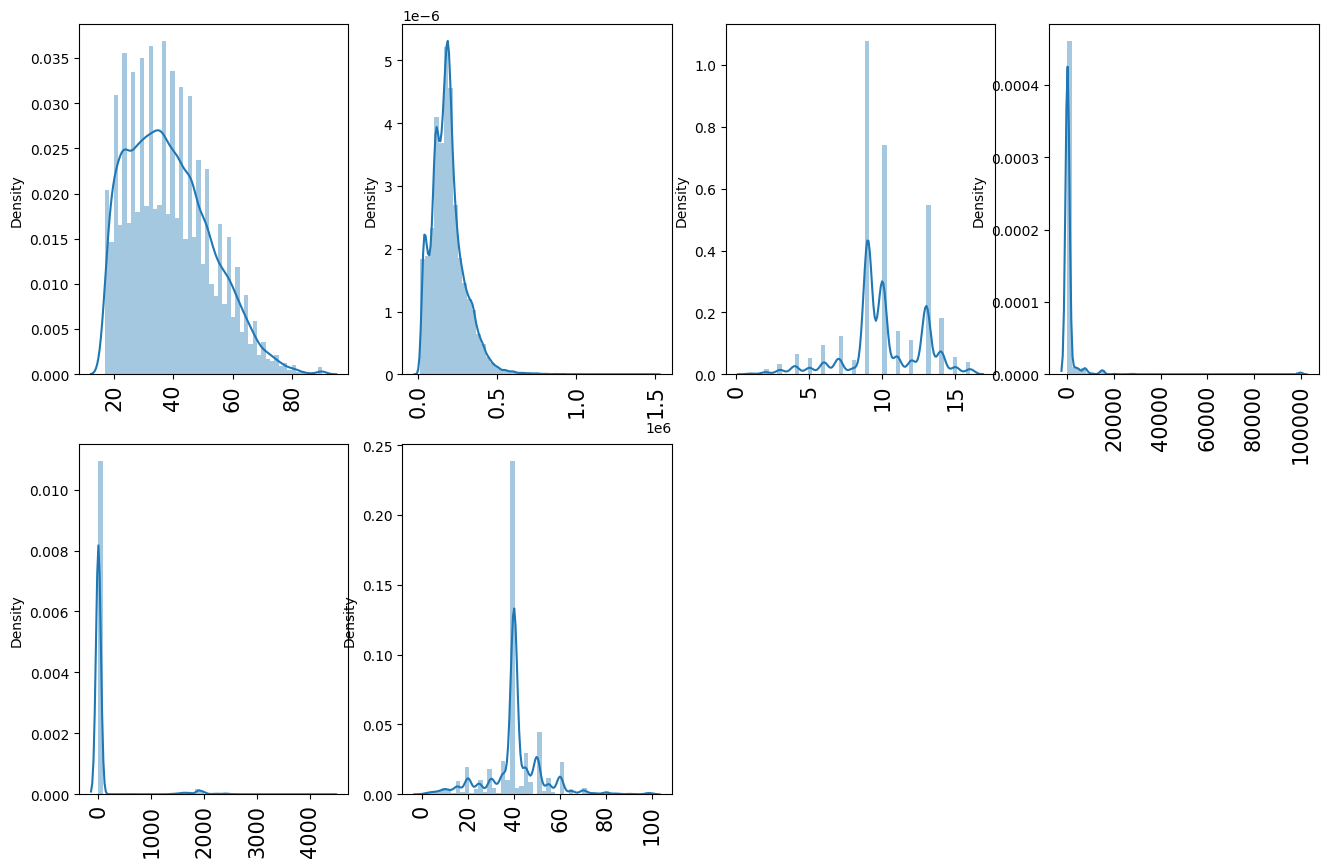

In [97]:
plt.figure(figsize= (16,10))
for i in range (0,len(numerical_cols)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[numerical_cols[i]])
    plt.xticks(size= 15,rotation = 90)

<Axes: xlabel='income'>

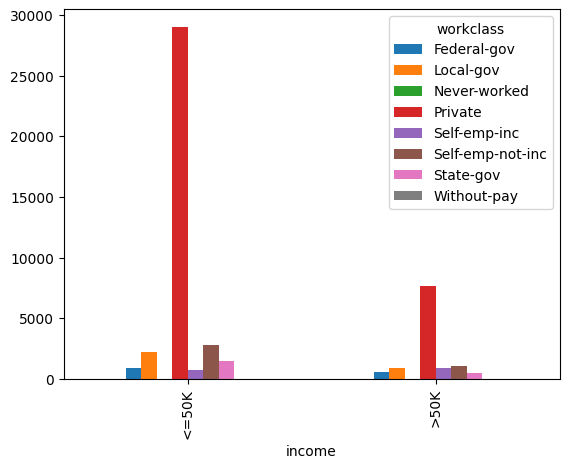

In [98]:
salary = pd.crosstab(df['income'],df['workclass'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

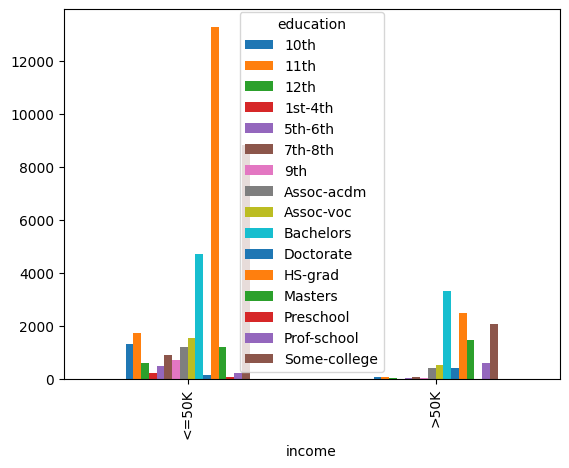

In [99]:
salary = pd.crosstab(df['income'],df['education'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

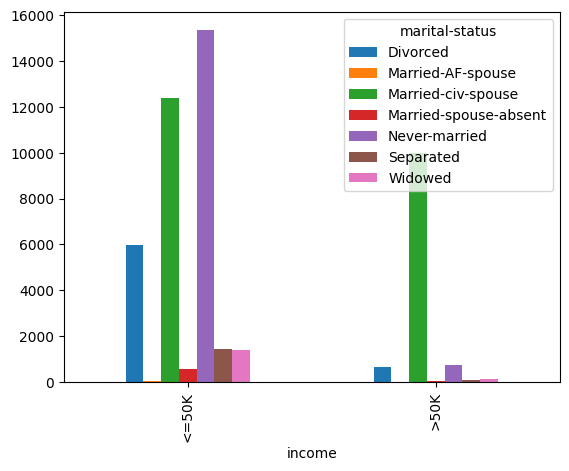

In [100]:
salary = pd.crosstab(df['income'],df['marital-status'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

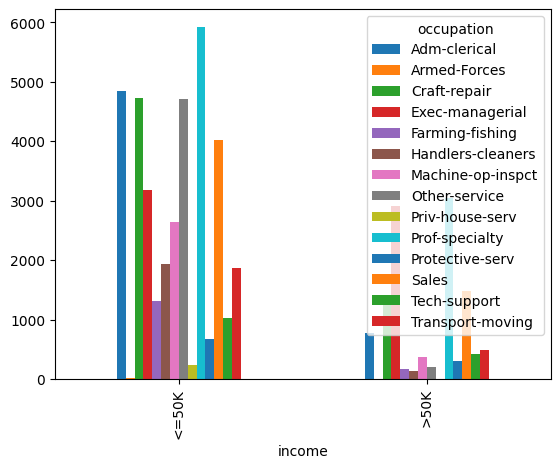

In [101]:
salary = pd.crosstab(df['income'],df['occupation'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

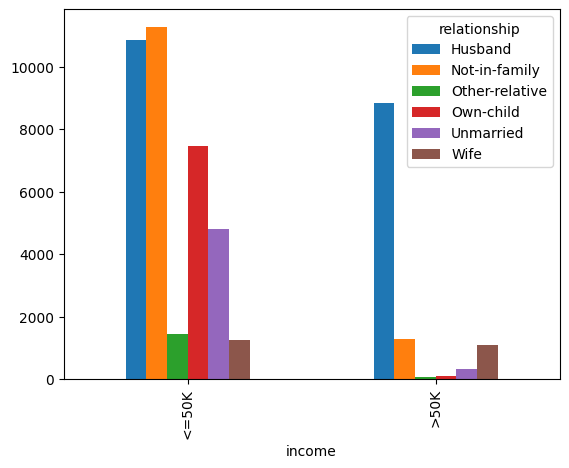

In [102]:
salary = pd.crosstab(df['income'],df['relationship'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

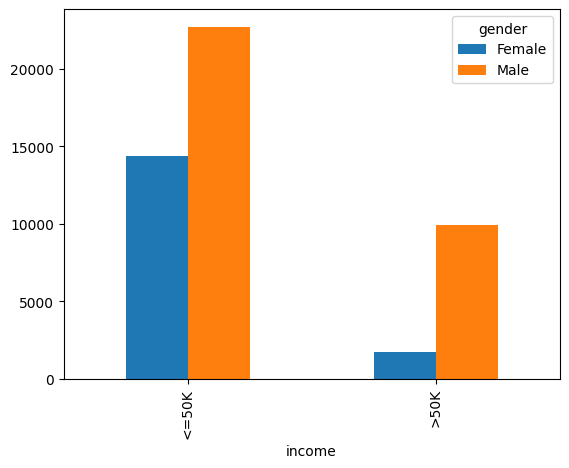

In [103]:
salary = pd.crosstab(df['income'],df['gender'])
salary.plot(kind = 'bar')

## Encoding Categorical Data

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['relationship', 'race', 'gender',  'native-country','workclass', 'education', 'marital-status', 'occupation']
for i in categorical_cols:
    df[i]=le.fit_transform(df[i])


In [111]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,>50K
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,<=50K


In [112]:
mapping ={'<=50K': 0 ,'>50K':1}
df['income'] = df['income'].map(mapping)

In [113]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


<Axes: >

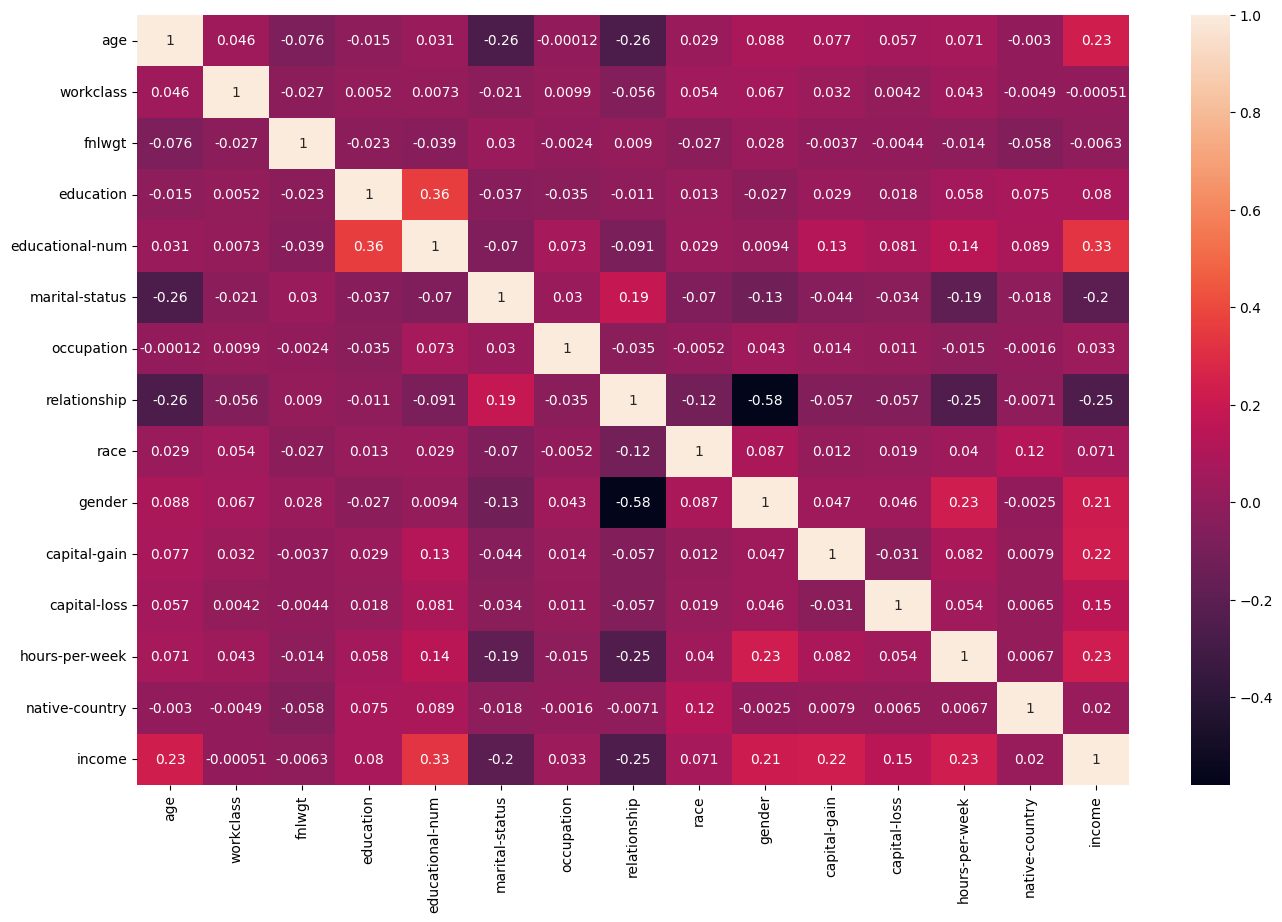

In [115]:
plt.figure(figsize= (16,10))
sns.heatmap(df.corr(),annot = True)

## Removing unwanted columns

In [116]:
df.drop(['education','fnlwgt','native-country'],axis = 1, inplace = True)

In [117]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,3,7,4,6,3,2,1,0,0,40,0
1,38,3,9,2,4,0,4,1,0,0,50,0
2,28,1,12,2,10,0,4,1,0,0,40,1
3,44,3,10,2,6,0,2,1,7688,0,40,1
4,18,3,10,4,9,3,4,0,0,0,30,0


In [118]:
df.to_csv("cleandata.csv",index = False)

# Model Training

In [120]:
df.shape

(48790, 12)

In [127]:
x = df.drop("income",axis = 1)
y = df['income']

In [121]:
categorical_cols = df.select_dtypes(include = ['object']).columns
numerical_cols = df.select_dtypes(exclude = ['object']).columns
print("Categorical Columns: ", categorical_cols)
print("Numerical Columns: ", numerical_cols)

Categorical Columns:  Index([], dtype='object')
Numerical Columns:  Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')


In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [124]:
num_pipeline = Pipeline(
    steps = ["imputer" , SimpleImputer(strategy = 'median'),
             "scaler" , StandardScaler()]
)  
cat_pipeline = Pipeline(
    steps = ["imputer" , SimpleImputer(strategy = 'most_frequent'),
             "scaler" ,StandardScaler()]
)
preprocessor = ColumnTransformer(
    [("num_pipeline",num_pipeline,numerical_cols)])

### Train Test Splitting

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,classification_report,recall_score

In [133]:
def performance_metrices(test,predict):
    ConfusionMatrix = print(f"Confusion Matrix:  {confusion_matrix(test,predict)} ")
    Accuracy = print(f"Confusion Matrix:  {accuracy_score(test,predict)} ")
    PrecisionScore = print(f"Precision Score:  {precision_score(test,predict)} ")
    ClassificationReport = print(f"Classification Report:  {classification_report(test,predict)} ")
    F1Score = print(f"F1 Score:  {f1_score(test,predict)} ")
    Recall = print(f"Recall Score:  {recall_score(test,predict)} ")
    return ConfusionMatrix,Accuracy,PrecisionScore,ClassificationReport,F1Score,Recall

## Use HyperParameter Tuning

In [136]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
accuracy_score(y_test,y_pred)

0.803238368518139

In [138]:
dr = DecisionTreeClassifier()


In [139]:
pram_grid={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["random","best"],
    "max_depth": [3,4,5,6],
    "min_samples_split":[2,3,4,5]}



In [141]:
grid_search = GridSearchCV(estimator = dr,param_grid = pram_grid,cv=5,scoring = "accuracy")

In [142]:
grid_search.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [3, 4, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['random', 'best']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [143]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [144]:
grid_search.score(x_train,y_train)

0.8549395367903259

In [146]:
y_pred = grid_search.predict(x_test)

In [147]:
accuracy_score(y_test,y_pred)

0.8528386964541914

In [148]:
rf = RandomForestClassifier()

In [151]:
pram_grid={
    
    "n_estimators":[20,50,30],
    "max_depth": [10,8,5],
    "min_samples_split":[2,10,5]}

In [152]:
grid_search = GridSearchCV(estimator = rf,param_grid = pram_grid,cv=5,scoring = "accuracy")
grid_search.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [10, 8, ...], 'min_samples_split': [2, 10, ...], 'n_estimators': [20, 50, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [153]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

In [154]:
y_pred = grid_search.predict(x_test)

In [155]:
accuracy_score(y_test,y_pred)

0.8580651772904284